<a href="https://colab.research.google.com/github/Aakarsh2Mittal/Proofs-for-self-projects/blob/main/Quantifying_gaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd

In [198]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5470 non-null   int64  
 1   Date               5470 non-null   object 
 2   Open               5470 non-null   float64
 3   High               5470 non-null   float64
 4   Low                5470 non-null   float64
 5   Close              5470 non-null   float64
 6   Shares Traded      5470 non-null   int64  
 7   Turnover (Rs. Cr)  5470 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 342.0+ KB


In [200]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2-Apr-01,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,3-Apr-01,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,4-Apr-01,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,6-Apr-01,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,9-Apr-01,1137.60,1138.55,1116.10,1128.35,28396434,746.64


In [201]:
df_new = df.head(5470)

In [202]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2-Apr-01,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,3-Apr-01,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,4-Apr-01,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,6-Apr-01,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,9-Apr-01,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,24-Mar-23,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,27-Mar-23,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,28-Mar-23,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,29-Mar-23,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [203]:
type(df_new['Date'][0])
df_new['Date'] = pd.to_datetime(df_new['Date'].to_numpy())

In [204]:
type(df_new['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [205]:
df_new

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [206]:
df = df_new

In [207]:
# df.tail(250)
# df.drop(index = 5)

In [208]:

df.drop_duplicates()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64
...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74


In [209]:
df1 = df

In [210]:
a = df1['Close'].to_numpy()

In [211]:
a

array([ 1138.1 ,  1149.25,  1136.65, ..., 16951.7 , 17080.7 , 17359.75])

In [212]:
len(a)

5470

In [213]:
b = np.insert(a,0,0)
a
len(b)
c = np.delete(b,len(b)-1)
c
len(c)

5470

In [214]:
df1['temp'] = c

In [215]:
df1['gap'] = df1['Open'] - df1['temp']

In [216]:
df1

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,1148.10
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00
...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60


In [217]:
df['gap'] = df1['gap']

In [218]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,1148.10
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00
...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60


In [219]:
arr = df['gap'].to_numpy()

In [220]:
arr[0] = 0

In [221]:
arr

array([  0.  ,  -1.45,  -3.15, ...,  46.05,  25.6 , 129.65])

In [222]:
gp = df['Open']

In [223]:
gp

0        1148.10
1        1136.65
2        1146.10
3        1137.55
4        1137.60
          ...   
5465    17076.20
5466    16984.30
5467    17031.75
5468    16977.30
5469    17210.35
Name: Open, Length: 5470, dtype: float64

In [224]:
arr = (arr/gp)*100
arr

0       0.000000
1      -0.127568
2      -0.274845
3       0.079117
4      -0.175809
          ...   
5465   -0.004099
5466    0.231096
5467    0.270377
5468    0.150790
5469    0.753326
Name: Open, Length: 5470, dtype: float64

In [225]:
b = arr[1]
np.round(b,3)

-0.128

In [226]:
ax = np.round(arr,3)
ax

0       0.000
1      -0.128
2      -0.275
3       0.079
4      -0.176
        ...  
5465   -0.004
5466    0.231
5467    0.270
5468    0.151
5469    0.753
Name: Open, Length: 5470, dtype: float64

In [227]:
df['gap-per'] = ax

In [228]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45,-0.128
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15,-0.275
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90,0.079
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00,-0.176
...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70,-0.004
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25,0.231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05,0.270
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60,0.151


In [229]:


# Calculate 5-day and 10-day moving averages
df['5-day SMA'] = df['Close'].rolling(window=5).mean()
df['1-month SMA'] = df['Close'].rolling(window=20).mean()
df['6-month SMA'] = df['Close'].rolling(window=125).mean()
df['1-year SMA'] = df['Close'].rolling(window=250).mean()

In [230]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000,NaN,NaN,NaN,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45,-0.128,NaN,NaN,NaN,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15,-0.275,NaN,NaN,NaN,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90,0.079,NaN,NaN,NaN,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00,-0.176,1138.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734


In [231]:
df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
249,249,2002-04-03,1136.60,1136.90,1121.45,1123.50,39862825,1031.04,1136.95,-0.35,-0.031,1130.46,1153.5700,1074.4156,1077.7000
250,250,2002-04-04,1124.05,1149.65,1123.90,1145.90,49472486,1388.14,1123.50,0.55,0.049,1134.97,1151.9400,1076.3020,1077.7312
251,251,2002-04-05,1146.05,1153.30,1139.90,1141.95,40192567,1133.81,1145.90,0.15,0.013,1137.45,1150.4075,1078.2404,1077.7020
252,252,2002-04-08,1141.90,1147.90,1134.00,1135.25,31263947,916.74,1141.95,-0.05,-0.004,1136.71,1147.5175,1080.0292,1077.6964
253,253,2002-04-09,1135.15,1137.45,1122.10,1126.70,37258542,1088.52,1135.25,-0.10,-0.009,1134.66,1144.4700,1081.7260,1077.6448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734


In [232]:
40163288 * 1148.10 / 10000000

4611.147095279999

In [233]:
import matplotlib.pyplot as plt

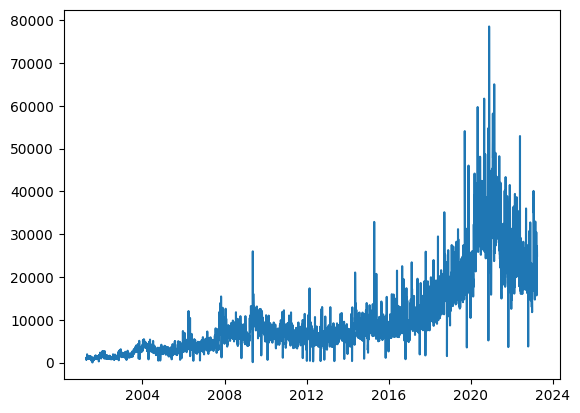

In [234]:
plt.plot(df['Date'], df['Turnover (Rs. Cr)'])  # Plot the chart
plt.show()

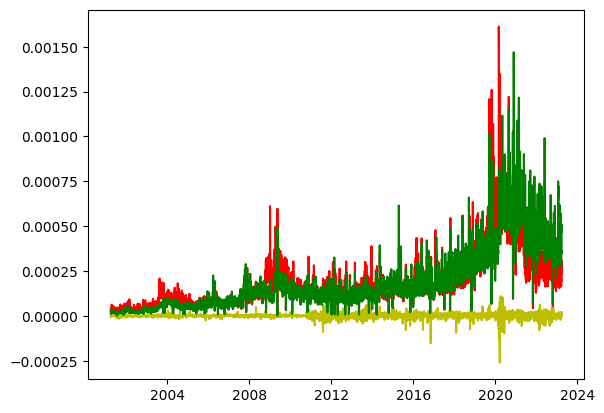

In [235]:
plt.plot(df['Date'], df['Shares Traded']/sum(df['Shares Traded']), color = 'r', label = 'share')
plt.plot(df['Date'], df['gap-per']/(sum(df['gap-per']*100)), color = 'y', label = 'share')
plt.plot(df['Date'], df['Turnover (Rs. Cr)']/sum(df['Turnover (Rs. Cr)']), color = 'g', label = 'turnover')  # Plot the chart
plt.show()

In [236]:
import matplotlib.pyplot as plt

(0.0, 410.0)

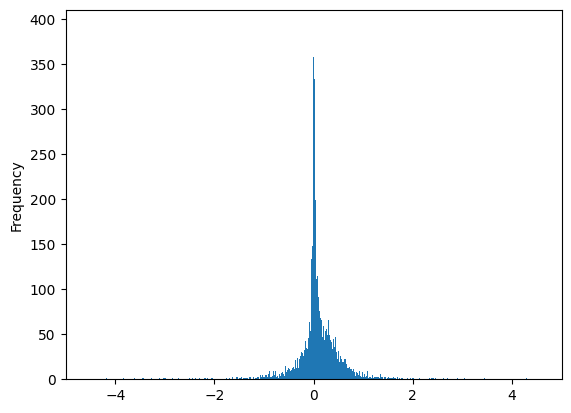

In [237]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-5,5)
plt.ylim(0,410)

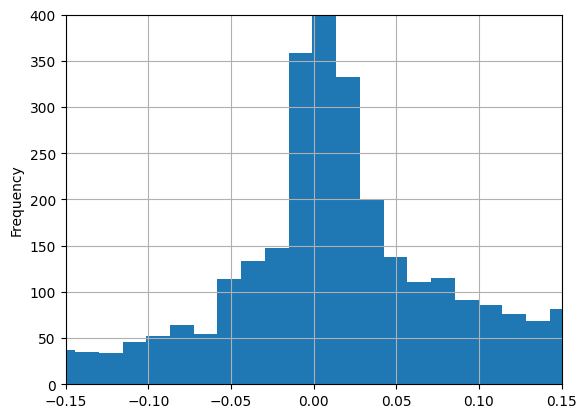

In [238]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-.15,.15)
plt.ylim(0,400)
plt.grid(True)
plt.show()

(0.0, 5.0)

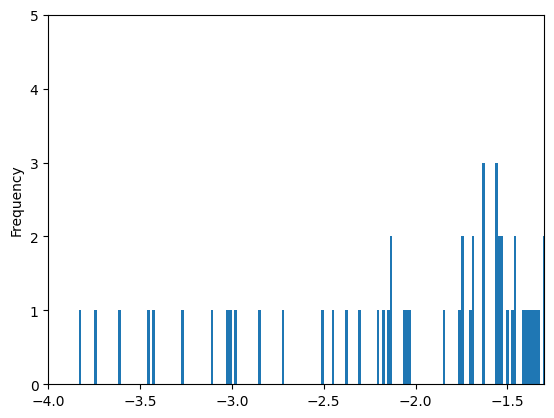

In [239]:
histo = ax.plot.hist(bins=1000)
plt.xlim(-4,-1.3)
plt.ylim(0,5)

(0.0, 5.0)

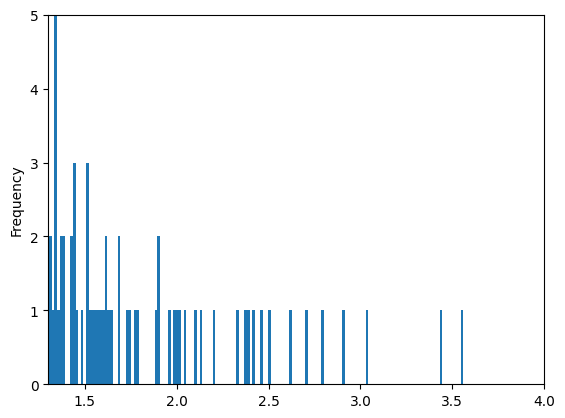

In [240]:
histo = ax.plot.hist(bins=1000)
plt.xlim(1.3, 4)
plt.ylim(0,5)

In [241]:
#turnover
#holiday - > just immediate one
#ok just note. prev. close - todays low -> candlestick thing
#interest rate, discount upone that , also the interest rate

#new ideas
'''
1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.
2.quaterly.. analyze the months during the financial earning releases by the company
3.analyze months of important days, election, demonitization, etc.
4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.

'''

'\n1.make a new holidays column, and note down the number of holidays, this particular day has had.. and also make different dataframes first with normalization and the second with different categorization based upon the number of holidays.\n2.quaterly.. analyze the months during the financial earning releases by the company\n3.analyze months of important days, election, demonitization, etc.\n4.take into account market behaviour based upon the cycles of different secotors of stocks, i.e. banking metals commodity auto etc.\n\n'

In [242]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,0.00,0.00,0.000,NaN,NaN,NaN,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,1138.10,-1.45,-0.128,NaN,NaN,NaN,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,1149.25,-3.15,-0.275,NaN,NaN,NaN,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,1136.65,0.90,0.079,NaN,NaN,NaN,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,1139.60,-2.00,-0.176,1138.39,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,17076.90,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,16945.05,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,16985.70,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,16951.70,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734


In [243]:
a = df['Date'].to_numpy()

In [244]:
b = np.insert(a,0,0)
c = np.delete(b,len(b)-1)
df['temp'] = c

In [245]:
df['Holiday'] = df['Date'] - df['temp']

In [246]:
a = df['Holiday'].dt.days

In [247]:
df['Holiday'] = a -1

In [248]:
df['Holiday'][0] = 0
df

<ipython-input-248-7230261df57b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][0] = 0


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-1.45,-0.128,NaN,NaN,NaN,NaN,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,-3.15,-0.275,NaN,NaN,NaN,NaN,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,0.90,0.079,NaN,NaN,NaN,NaN,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,-2.00,-0.176,1138.39,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0


(array([4.168e+03, 0.000e+00, 1.710e+02, 0.000e+00, 1.012e+03, 0.000e+00,
        1.080e+02, 0.000e+00, 1.000e+01, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

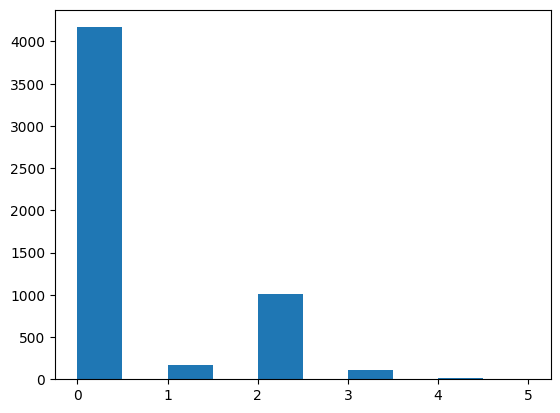

In [249]:
plt.hist(df['Holiday'])

In [250]:
df['Holiday'].value_counts()

0    4168
2    1012
1     171
3     108
4      10
5       1
Name: Holiday, dtype: int64

In [251]:
df5 = df.index[df['Holiday']==5].to_list()
df5

[3370]

In [252]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-1.45,-0.128,NaN,NaN,NaN,NaN,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,-3.15,-0.275,NaN,NaN,NaN,NaN,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,0.90,0.079,NaN,NaN,NaN,NaN,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,-2.00,-0.176,1138.39,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0


In [253]:
df["target"]= (df["gap-per"]>0.05).astype(int)

In [254]:
df


,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0,0
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-1.45,-0.128,NaN,NaN,NaN,NaN,0,0
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,-3.15,-0.275,NaN,NaN,NaN,NaN,0,0
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,0.90,0.079,NaN,NaN,NaN,NaN,1,1
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,-2.00,-0.176,1138.39,NaN,NaN,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0,0
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2,1
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0,1
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0,1


In [255]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-255-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Unnamed: 0,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target
Unnamed: 0,1.000000,0.947019,0.947118,0.946904,0.946967,0.653414,0.775212,0.130145,0.093223,0.947088,0.947468,0.951328,0.955933,0.007589,0.393692
Open,0.947019,1.000000,0.999941,0.999914,0.999862,0.590275,0.797255,0.135985,0.088276,0.999842,0.998844,0.991883,0.984467,0.005310,0.352326
High,0.947118,0.999941,1.000000,0.999890,0.999935,0.592123,0.798831,0.134483,0.086771,0.999851,0.998944,0.992146,0.984776,0.005443,0.351825
Low,0.946904,0.999914,0.999890,1.000000,0.999933,0.587622,0.795141,0.136339,0.088660,0.999748,0.998627,0.991550,0.984116,0.004858,0.352454
Close,0.946967,0.999862,0.999935,0.999933,1.000000,0.589889,0.797087,0.135604,0.087869,0.999765,0.998735,0.991799,0.984393,0.005173,0.352288
Shares Traded,0.653414,0.590275,0.592123,0.587622,0.589889,1.000000,0.879340,0.082087,0.051998,0.589983,0.589535,0.584245,0.585814,-0.028801,0.234589
Turnover (Rs. Cr),0.775212,0.797255,0.798831,0.795141,0.797087,0.879340,1.000000,0.128192,0.083192,0.796695,0.794947,0.784904,0.778060,-0.024035,0.278831
gap,0.130145,0.135985,0.134483,0.136339,0.135604,0.082087,0.128192,1.000000,0.921979,0.126791,0.122941,0.118326,0.116117,-0.015325,0.505437
gap-per,0.093223,0.088276,0.086771,0.088660,0.087869,0.051998,0.083192,0.921979,1.000000,0.079558,0.075797,0.071183,0.070642,-0.009002,0.547215
5-day SMA,0.947088,0.999842,0.999851,0.999748,0.999765,0.589983,0.796695,0.126791,0.079558,1.000000,0.999225,0.992334,0.984915,0.005085,0.348335


In [256]:
! pip install --upgrade ta

In [257]:
import ta

In [258]:
from ta import add_all_ta_features
from ta.utils import dropna

In [259]:
from ta.momentum import RSIIndicator

In [260]:
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

In [261]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
0,0,2001-04-02,1148.10,1148.10,1094.35,1138.10,40163288,1053.60,1970-01-01,0.00,0.000,NaN,NaN,NaN,NaN,0,0,NaN
1,1,2001-04-03,1136.65,1153.10,1128.10,1149.25,29797348,796.52,2001-04-02,-1.45,-0.128,NaN,NaN,NaN,NaN,0,0,NaN
2,2,2001-04-04,1146.10,1146.15,1120.35,1136.65,27091152,681.11,2001-04-03,-3.15,-0.275,NaN,NaN,NaN,NaN,0,0,NaN
3,3,2001-04-06,1137.55,1171.85,1133.05,1139.60,36171484,996.96,2001-04-04,0.90,0.079,NaN,NaN,NaN,NaN,1,1,NaN
4,4,2001-04-09,1137.60,1138.55,1116.10,1128.35,28396434,746.64,2001-04-06,-2.00,-0.176,1138.39,NaN,NaN,NaN,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0,0,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0,1,42.300765


In [262]:
df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
249,249,2002-04-03,1136.60,1136.90,1121.45,1123.50,39862825,1031.04,2002-04-02,-0.35,-0.031,1130.46,1153.5700,1074.4156,1077.7000,0,0,41.383285
250,250,2002-04-04,1124.05,1149.65,1123.90,1145.90,49472486,1388.14,2002-04-03,0.55,0.049,1134.97,1151.9400,1076.3020,1077.7312,0,0,50.445696
251,251,2002-04-05,1146.05,1153.30,1139.90,1141.95,40192567,1133.81,2002-04-04,0.15,0.013,1137.45,1150.4075,1078.2404,1077.7020,0,0,49.006855
252,252,2002-04-08,1141.90,1147.90,1134.00,1135.25,31263947,916.74,2002-04-05,-0.05,-0.004,1136.71,1147.5175,1080.0292,1077.6964,2,0,46.579964
253,253,2002-04-09,1135.15,1137.45,1122.10,1126.70,37258542,1088.52,2002-04-08,-0.10,-0.009,1134.66,1144.4700,1081.7260,1077.6448,0,0,43.611892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0,0,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0,1,42.300765


In [266]:
cormatrix=df.corr()

<ipython-input-266-341ffadcde26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormatrix=df.corr()


In [267]:
cormatrix["gap"]

Unnamed: 0           0.130145
Open                 0.135985
High                 0.134483
Low                  0.136339
Close                0.135604
Shares Traded        0.082087
Turnover (Rs. Cr)    0.128192
gap                  1.000000
gap-per              0.921979
5-day SMA            0.126791
1-month SMA          0.122941
6-month SMA          0.118326
1-year SMA           0.116117
Holiday             -0.015325
target               0.505437
RSI                  0.137350
Name: gap, dtype: float64

In [275]:
df.dropna()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),temp,gap,gap-per,5-day SMA,1-month SMA,6-month SMA,1-year SMA,Holiday,target,RSI
249,249,2002-04-03,1136.60,1136.90,1121.45,1123.50,39862825,1031.04,2002-04-02,-0.35,-0.031,1130.46,1153.5700,1074.4156,1077.7000,0,0,41.383285
250,250,2002-04-04,1124.05,1149.65,1123.90,1145.90,49472486,1388.14,2002-04-03,0.55,0.049,1134.97,1151.9400,1076.3020,1077.7312,0,0,50.445696
251,251,2002-04-05,1146.05,1153.30,1139.90,1141.95,40192567,1133.81,2002-04-04,0.15,0.013,1137.45,1150.4075,1078.2404,1077.7020,0,0,49.006855
252,252,2002-04-08,1141.90,1147.90,1134.00,1135.25,31263947,916.74,2002-04-05,-0.05,-0.004,1136.71,1147.5175,1080.0292,1077.6964,2,0,46.579964
253,253,2002-04-09,1135.15,1137.45,1122.10,1126.70,37258542,1088.52,2002-04-08,-0.10,-0.009,1134.66,1144.4700,1081.7260,1077.6448,0,0,43.611892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,5465,2023-03-24,17076.20,17109.45,16917.35,16945.05,228038299,19019.88,2023-03-23,-0.70,-0.004,17053.95,17276.1550,17832.1772,17335.2920,0,0,35.553580
5466,5466,2023-03-27,16984.30,17091.00,16918.55,16985.70,218418670,18466.56,2023-03-24,39.25,0.231,17053.41,17252.1500,17829.4440,17334.3438,2,1,37.375231
5467,5467,2023-03-28,17031.75,17061.75,16913.75,16951.70,238840919,20942.50,2023-03-27,46.05,0.270,17022.25,17230.1000,17828.9272,17333.5386,0,1,36.447260
5468,5468,2023-03-29,16977.30,17126.15,16940.60,17080.70,345911087,27261.74,2023-03-28,25.60,0.151,17008.01,17218.9375,17829.5136,17332.9734,0,1,42.300765


In [280]:
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(n_estimators = 100,min_samples_split=100,random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["RSI","Shares Traded","Holiday"]
model.fit(train[predictors],train["target"])

ValueError: ignored

In [293]:
columns_to_select = ['RSI', 'Holiday', 'Shares Traded']
X = df[columns_to_select].copy()
X.dropna()
X

,RSI,Holiday,Shares Traded
0,NaN,0,40163288
1,NaN,0,29797348
2,NaN,0,27091152
3,NaN,1,36171484
4,NaN,2,28396434
...,...,...,...
5465,35.553580,0,228038299
5466,37.375231,2,218418670
5467,36.447260,0,238840919
5468,42.300765,0,345911087


In [294]:
y = df["target"]
y

0       0
1       0
2       0
3       1
4       0
       ..
5465    0
5466    1
5467    1
5468    1
5469    1
Name: target, Length: 5470, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [296]:
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(n_estimators = 100,min_samples_split=100,random_state=1)


model.fit(X_train,y_train)

ValueError: ignored